In [1]:
import torch
import torchani
from torchani.datasets import ANIDataset
from torchani.units import hartree2kcalmol
from pathlib import Path
import pandas as pd
import math
from tqdm import tqdm
import ast
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
ani2x = torchani.models.ANI2x().to(device)

ds_path = Path.cwd() / '/home/nick/First_DSs/ANI-1x-first-conformers.h5'

ds = ANIDataset(locations=(ds_path), names=('ANI-1x'))
print(len(ds))

cos = torch.nn.CosineSimilarity(dim=-1)

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 200

3114


In [4]:
# Computed with a script called comp6v1-cos_sim-magnitudes.py (same-filename.sh to submit)

df = pd.read_parquet('cos_sim-mag_df-1x.pq')
#forces_df = pd.read_csv('cos_sim-forces_df-1x.csv')

In [5]:
print(df.iloc[0])

Dataset magnitudes                                            87.385611
Members magnitudes    [89.54424285888672, 91.39707946777344, 95.7331...
Mean magnitudes                                               92.691879
Stdev magnitudes                                               2.293329
Difference                                                     5.306268
Cos Sim               [0.9992776119432105, 0.9997875403792146, 0.999...
Mean Cos Sim                                                   0.999835
Name: 6, dtype: object


In [6]:
#coef_var = df['Stdev magnitudes']/df['Mean magnitudes']
#df['coef_var'] = coef_var

In [7]:
df

,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Cos Sim,Mean Cos Sim
Species,,,,,,,
6,87.385611,"[89.54424285888672, 91.39707946777344, 95.7331...",92.691879,2.293329,5.306268,"[0.9992776119432105, 0.9997875403792146, 0.999...",0.999835
6,59.838473,"[53.301204681396484, 60.627288818359375, 59.74...",57.683975,2.181344,2.154498,"[0.9986156260247054, 0.9981327798781487, 0.999...",0.999805
6,47.391705,"[48.18741226196289, 47.920318603515625, 47.080...",46.898197,0.844016,0.493508,"[0.997251402166701, 0.9977963395929176, 0.9986...",0.998246
6,69.920726,"[66.66938781738281, 64.64178466796875, 64.3539...",64.297386,2.282719,5.623340,"[0.994655484105484, 0.9954464790442856, 0.9990...",0.997238
6,106.263831,"[107.74405670166016, 106.4841537475586, 108.04...",106.964226,0.958309,0.700394,"[0.9979898611922774, 0.9982497184568229, 0.999...",0.997823
...,...,...,...,...,...,...,...
8,39.493116,"[39.820560455322266, 39.09206008911133, 39.711...",39.499577,0.381365,0.006460,"[0.99995929942855, 0.9999989732876033, 0.99990...",0.999994
8,15.416519,"[17.09703254699707, 17.787954330444336, 17.809...",17.120802,0.773517,1.704283,"[0.999413534661843, 0.9994241319755873, 0.9995...",0.999339
8,14.867488,"[15.758891105651855, 16.229572296142578, 16.50...",14.926759,1.115489,0.059270,"[0.9978122121415561, 0.9962737381226703, 0.999...",0.984406


In [8]:
df['Z-score'] = df.apply(lambda row: [(member - row['Mean magnitudes']) / row['Stdev magnitudes'] for member in row['Members magnitudes']], axis=1)

In [9]:
df['Z-score'].iloc[0]

[-1.3725184711504483,
 -0.5645940047940938,
 1.326123236925064,
 0.1756405267577365,
 0.9270862973271736,
 1.0225914159376952,
 -0.9311150244637677,
 -0.48680397454225366]

In [10]:
df['Abs Z-score sum'] = df['Z-score'].apply(lambda z_scores: sum(abs(score) for score in z_scores))


In [11]:
df['Abs Z-score sum'].mean()

6.219206196531122

In [12]:
plt.rcParams['font.serif']=['Times New Roman']

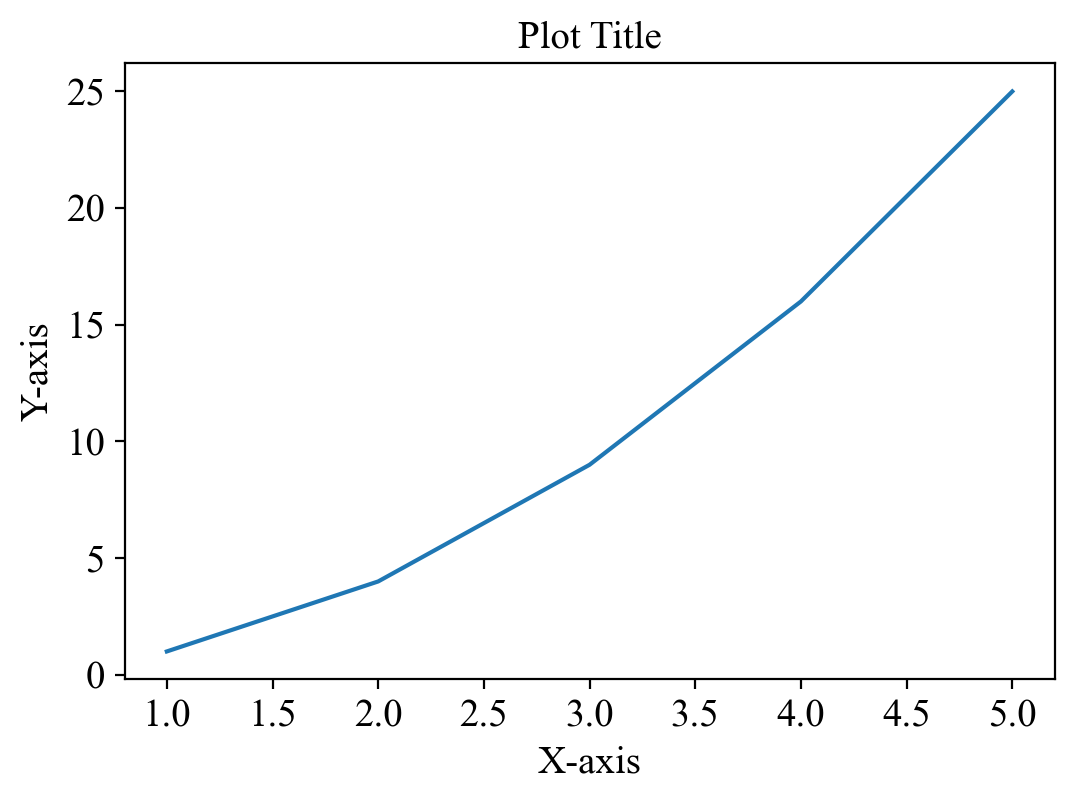

In [13]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Define the font properties
font = FontProperties(fname='/usr/share/fonts/truetype/msttcorefonts/Times_New_Roman.ttf',
                      size=14,
                      weight='bold')

# Plotting example
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

plt.plot(x, y)
plt.xlabel('X-axis', fontproperties=font)
plt.ylabel('Y-axis', fontproperties=font)
plt.xticks(fontproperties=font)
plt.yticks(fontproperties=font)
plt.title('Plot Title', fontproperties=font)
plt.show()


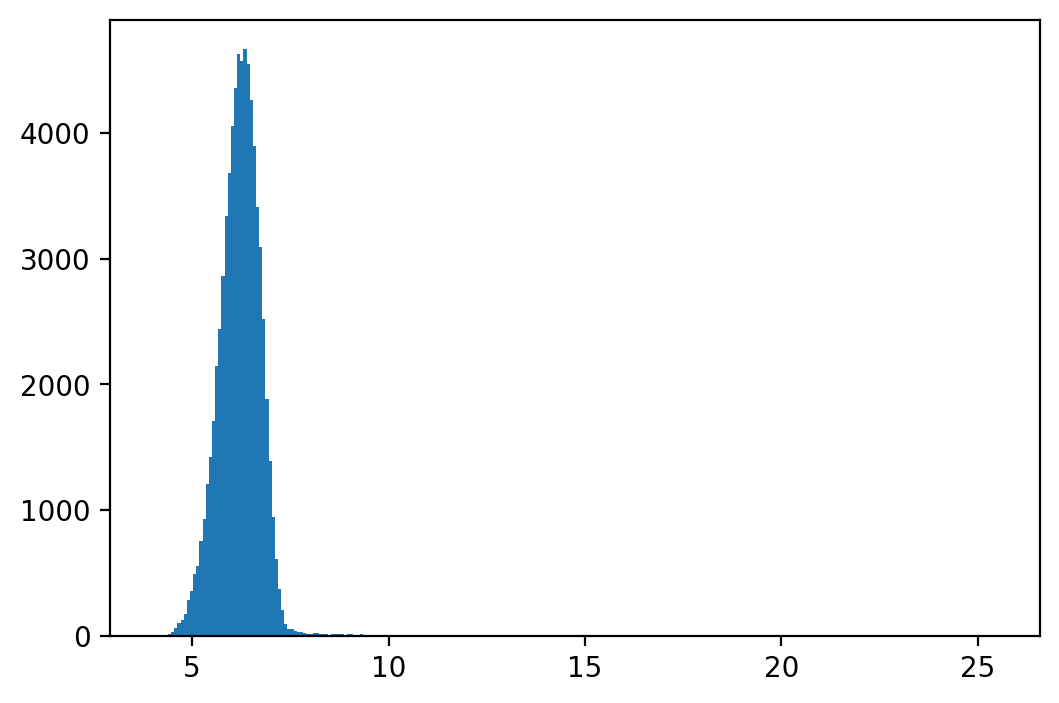

In [14]:
bins = math.isqrt(len(df['Abs Z-score sum'].values))
plt.hist(df['Abs Z-score sum'], bins=bins)#, range=[10,max(df['Abs Z-score sum'])])
plt.show()

In [15]:
df['x-range'] = [(max(row['Members magnitudes']) - min(row['Members magnitudes'])) / row['Mean magnitudes'] for _, row in df.iterrows()]

In [17]:
df['x-range'].mean()

0.17809013914373714

In [18]:
df_sorted = df.sort_values('x-range')

In [19]:
df_sorted

,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Cos Sim,Mean Cos Sim,Z-score,Abs Z-score sum,x-range
Species,,,,,,,,,,
6,155.893590,"[156.04937744140625, 156.8473358154297, 156.39...",156.450424,0.306389,0.556834,"[0.9996861298908488, 0.9995861636547341, 0.999...",0.999659,"[-1.3089459173644782, 1.2954495758659517, -0.1...",6.470624,0.005100
8,139.679862,"[140.27789306640625, 140.15786743164062, 139.8...",139.880157,0.263475,0.200296,"[0.9999698200471268, 0.9998840773947276, 0.999...",0.999940,"[1.5095763901559065, 1.0540278639161167, -0.25...",6.426327,0.005118
1,65.751884,"[66.09597778320312, 66.00474548339844, 66.1062...",66.091553,0.106722,0.339668,"[0.9998439180303864, 0.999865511813604, 0.9999...",0.999875,"[0.041463179995244355, -0.8133932103205005, 0....",5.665372,0.005151
1,106.982507,"[107.03372955322266, 106.9434585571289, 106.95...",106.754135,0.236391,0.228372,"[0.9999927766617541, 0.9999911561245806, 0.999...",0.999988,"[1.1827619861624532, 0.8008906236969268, 0.851...",7.261785,0.005643
1,68.855283,"[68.549072265625, 68.70989227294922, 68.806800...",68.601242,0.143023,0.254041,"[0.9996525415185706, 0.9997284388041134, 0.999...",0.999684,"[-0.3647641203704427, 0.759667422959268, 1.437...",6.474803,0.005662
...,...,...,...,...,...,...,...,...,...,...
1,1.831382,"[1.1583210229873657, 0.8235984444618225, 1.441...",0.285957,0.658818,1.545424,"[0.9789877936707815, 0.43284037478451176, -0.7...",0.509653,"[1.3241352106304778, 0.8160695730845349, 1.754...",11.657003,7.713576
1,2.223579,"[2.6350209712982178, 0.9128708243370056, 1.996...",0.629244,1.669268,1.594335,"[0.21429727023619438, -0.1833589850573783, 0.8...",-0.659335,"[1.2015907279912053, 0.16991081948125644, 0.81...",6.011532,7.837011
6,8.020901,"[5.8522047996521, 9.755074501037598, 7.3875102...",0.936651,2.827746,7.084250,"[-0.9693706110326847, 0.99284973481106, 0.9876...",-0.420794,"[1.7383295286636018, 3.1185348754365885, 2.281...",14.347673,8.978041


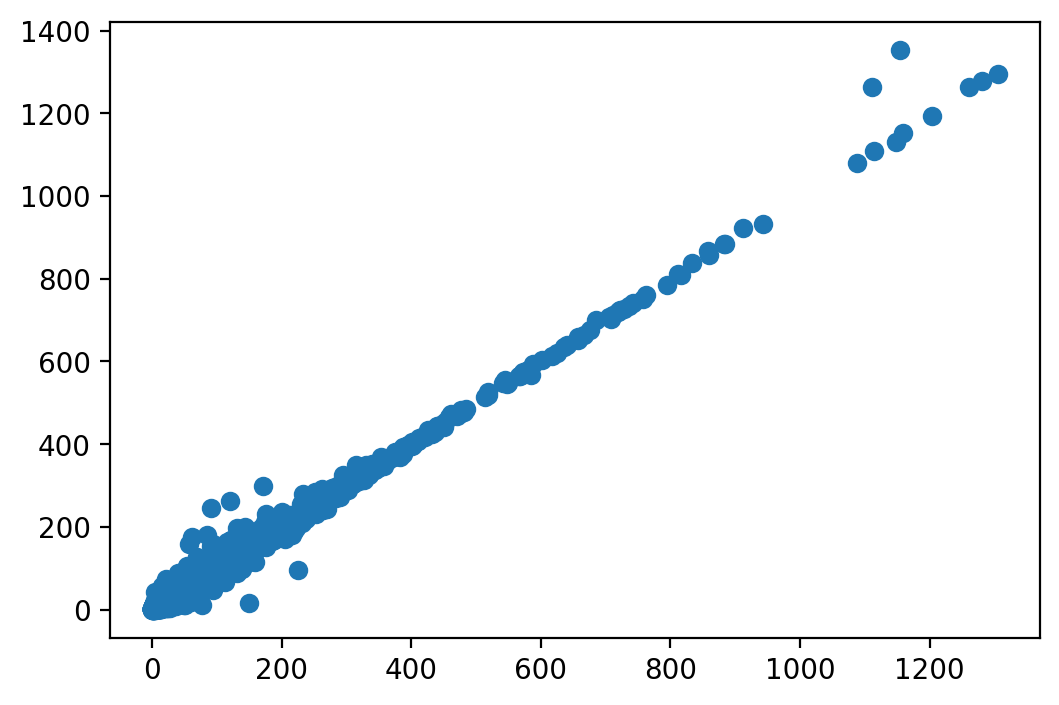

In [40]:
plt.scatter(df['Mean magnitudes'], df['Dataset magnitudes'])
plt.show()

In [41]:
df['x-range'].corr(df['Stdev magnitudes']/df['Mean magnitudes'])

0.9946520383576448

In [ ]:
df.loc[df['Difference'] == 200.31763816481475]

In [ ]:
np.quantile(df['x-range'],0.95)

In [ ]:
bins = math.isqrt(len(df['x-range'].values))
plt.hist(df['x-range'], bins=bins)
plt.show()

In [ ]:
np.quantile(df['x-range'],0.98)

In [ ]:
np.quantile(df[df['x-range'] < 2]['Mean Cos Sim'],0.1)

In [23]:
df

,Dataset magnitudes,Members magnitudes,Mean magnitudes,Stdev magnitudes,Difference,Cos Sim,Mean Cos Sim,Z-score,Abs Z-score sum,x-range
Species,,,,,,,,,,
6,87.385611,"[89.54424285888672, 91.39707946777344, 95.7331...",92.691879,2.293329,5.306268,"[0.9992776119432105, 0.9997875403792146, 0.999...",0.999835,"[-1.3725184711504483, -0.5645940047940938, 1.3...",6.806473,0.066768
6,59.838473,"[53.301204681396484, 60.627288818359375, 59.74...",57.683975,2.181344,2.154498,"[0.9986156260247054, 0.9981327798781487, 0.999...",0.999805,"[-2.0092069070821132, 1.3493122581623915, 0.94...",5.409134,0.127004
6,47.391705,"[48.18741226196289, 47.920318603515625, 47.080...",46.898197,0.844016,0.493508,"[0.997251402166701, 0.9977963395929176, 0.9986...",0.998246,"[1.5274762881944282, 1.2110207689894652, 0.215...",6.928413,0.043257
6,69.920726,"[66.66938781738281, 64.64178466796875, 64.3539...",64.297386,2.282719,5.623340,"[0.994655484105484, 0.9954464790442856, 0.9990...",0.997238,"[1.0391122427376533, 0.1508720268039241, 0.024...",5.355213,0.117799
6,106.263831,"[107.74405670166016, 106.4841537475586, 108.04...",106.964226,0.958309,0.700394,"[0.9979898611922774, 0.9982497184568229, 0.999...",0.997823,"[0.8137571402981509, -0.5009573472921601, 1.12...",6.575117,0.024436
...,...,...,...,...,...,...,...,...,...,...
8,39.493116,"[39.820560455322266, 39.09206008911133, 39.711...",39.499577,0.381365,0.006460,"[0.99995929942855, 0.9999989732876033, 0.99990...",0.999994,"[0.8416711965568042, -1.068573523789816, 0.556...",6.380013,0.027735
8,15.416519,"[17.09703254699707, 17.787954330444336, 17.809...",17.120802,0.773517,1.704283,"[0.999413534661843, 0.9994241319755873, 0.9995...",0.999339,"[-0.030728983456309422, 0.8624926844284955, 0....",5.921096,0.129189
8,14.867488,"[15.758891105651855, 16.229572296142578, 16.50...",14.926759,1.115489,0.059270,"[0.9978122121415561, 0.9962737381226703, 0.999...",0.984406,"[0.7459797067604875, 1.1679301583922546, 1.412...",7.194567,0.184540


In [82]:
df[df['x-range'] > 2]['Mean Cos Sim'].mean()

0.38430494890755756

In [25]:
df['Relative difference'] = df['Difference']/df['Dataset magnitudes']

In [26]:
x_quant = np.quantile(df['x-range'], 0.98)
y_quant = np.quantile(df['Relative difference'], 0.98)

In [35]:
df['x-range'].median()

0.09558853497457778

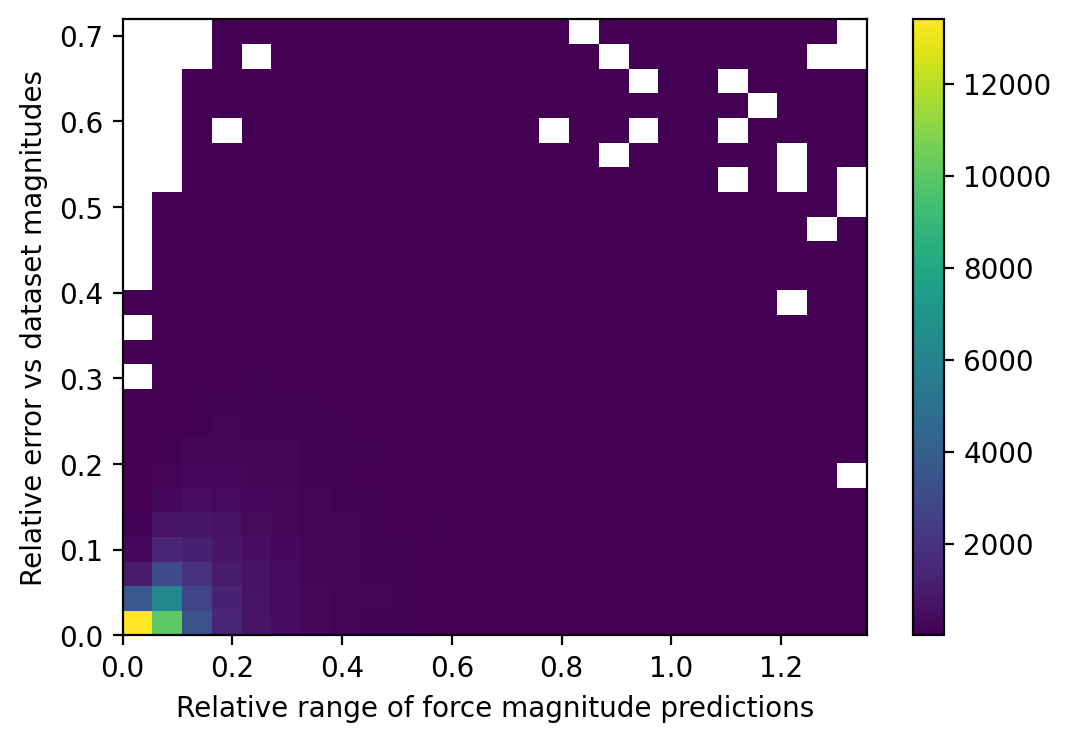

In [37]:
xquant = np.quantile(df['x-range'],0.99)
yquant = np.quantile(df['Relative difference'],0.99)
plt.hist2d(df['x-range'],df['Relative difference'],bins=25, cmin=1, range=[[0,xquant],[0,yquant]])
plt.xlabel('Relative range of force magnitude predictions')
plt.colorbar()
plt.ylabel('Relative error vs dataset magnitudes')
plt.show()

In [58]:
from torchani.utils import PERIODIC_TABLE
from ase.optimize import BFGS

def tensor_from_xyz(path):
    with open(path, 'r') as f:
        lines = f.readlines()
        num_atoms = int(lines[0])
        coordinates = []
        species = []
        _, a, b, c = lines[2].split()
        cell = torch.diag(torch.tensor([float(a), float(b), float(c)]))
        for line in lines[2:]:
            values = line.split()
            if values:
                s = values[0].strip()
                x = float(values[1])
                y = float(values[2])
                z = float(values[3])
                coordinates.append([x, y, z])
                species.append(PERIODIC_TABLE.index(s))
        coordinates = torch.tensor(coordinates)
        species = torch.tensor(species, dtype=torch.long)
        assert coordinates.shape[0] == num_atoms
        assert species.shape[0] == num_atoms
    return species[None].to(device), coordinates[None].to(device), cell

In [81]:
epoxide = tensor_from_xyz('m-epoxide.xyz')
import ase
calculator = ani2x.ase()

ase_epoxide = ase.Atoms(numbers=epoxide[0][0].to('cpu'),positions=epoxide[1][0].to('cpu'))
ase_epoxide.calc = calculator

dyn = BFGS(ase_epoxide)
dyn.run(fmax=0.05)

epoxide_coord = torch.tensor(ase_epoxide.positions[None])
epoxide = (epoxide[0], epoxide_coord.float())

#print(epoxide)

epoxide = (epoxide[0].to(device),epoxide[1].to(device))
*_, model_forces = ani2x.members_forces(epoxide)
mean_forces = model_forces.mean(0)
print(cos(mean_forces, model_forces))


      Step     Time          Energy         fmax
BFGS:    0 15:23:10    -8421.702564       14.9593
BFGS:    1 15:23:10    -8423.945058        6.8143
BFGS:    2 15:23:10    -8425.092855        5.7354
BFGS:    3 15:23:10    -8426.111890        2.1339
BFGS:    4 15:23:10    -8426.418501        1.8436
BFGS:    5 15:23:10    -8426.722482        1.7755
BFGS:    6 15:23:11    -8426.996323        1.5681
BFGS:    7 15:23:11    -8427.415224        2.2471
BFGS:    8 15:23:11    -8427.733153        2.3578
BFGS:    9 15:23:11    -8428.249641        1.6620
BFGS:   10 15:23:11    -8428.451928        2.0504
BFGS:   11 15:23:11    -8428.647665        1.1464
BFGS:   12 15:23:11    -8428.798149        1.2918
BFGS:   13 15:23:11    -8428.880934        1.0885
BFGS:   14 15:23:11    -8428.958659        0.7361
BFGS:   15 15:23:11    -8429.017365        0.7595
BFGS:   16 15:23:11    -8429.055961        0.7960
BFGS:   17 15:23:11    -8429.124943        0.5820
BFGS:   18 15:23:11    -8429.158573        0.5447
B

In [79]:
import ase
calculator = ani2x.ase()
ch5 = tensor_from_xyz('ch5.xyz')

ase_ch5 = ase.Atoms(numbers=ch5[0][0].to('cpu'),positions=ch5[1][0].to('cpu'))
ase_ch5.calc = calculator

dyn = BFGS(ase_ch5)
dyn.run(fmax=0.05)

ch5_coord = torch.tensor(ase_ch5.positions[None])
ch5 = (ch5[0], ch5_coord.float())

print(ch5)

ch5 = (ch5[0].to(device),ch5[1].to(device))
*_, model_forces = ani2x.members_forces(ch5)
mean_forces = model_forces.mean(0)
print(cos(mean_forces, model_forces))


      Step     Time          Energy         fmax
BFGS:    0 15:21:27    -1116.167198        0.4223
BFGS:    1 15:21:27    -1116.175871        0.2969
BFGS:    2 15:21:27    -1116.182090        0.0541
BFGS:    3 15:21:27    -1116.182233        0.0311
(tensor([[6, 1, 1, 1, 1, 1]], device='cuda:0'), tensor([[[ 1.5394e+00, -3.3886e-01,  4.8973e-06],
         [ 2.4156e+00, -1.0414e+00,  1.0968e-01],
         [ 6.6337e-01,  3.6378e-01, -1.0981e-01],
         [ 1.1664e+00, -6.5049e-01,  9.8277e-01],
         [ 1.2221e+00, -8.7541e-01, -9.0197e-01],
         [ 2.2296e+00,  5.0922e-01, -8.0671e-02]]]))
tensor([[-0.9832,  0.9999,  0.9999,  1.0000,  0.9998,  0.9999],
        [ 0.9999,  1.0000,  1.0000, -1.0000, -0.9997, -0.9999],
        [ 0.9986, -0.9999, -0.9999, -1.0000, -0.9998, -0.9999],
        [-0.9567,  1.0000,  1.0000, -0.9999, -0.9997, -0.9999],
        [ 0.9912, -0.9999, -0.9999,  1.0000,  1.0000,  1.0000],
        [ 0.9922, -0.9751, -0.9752,  1.0000,  1.0000,  1.0000],
        [ 0.9982

In [12]:
re_df = df.reset_index()
idx_max = re_df['coef_var'].idxmax()
idx_min = re_df['coef_var'].idxmin()

In [13]:
print('Atom type:\n',re_df['Species'].iloc[idx_max])
print('Predicted magnitudes:\n',re_df['Members magnitudes'].iloc[idx_max].round(4))
print('Dataset magnitude:\n',re_df['Dataset magnitudes'].iloc[idx_max].round(4))

Atom type:
 8
Predicted magnitudes:
 [0.7082 2.7452 0.1778 0.8793 4.442  0.6226 0.4949 1.4545]
Dataset magnitude:
 4.1579


In [14]:
print(re_df['Species'].iloc[idx_min])
print(re_df['Members magnitudes'].iloc[idx_min])
print(re_df['Dataset magnitudes'].iloc[idx_min])

1
[66.09597778 66.00474548 66.1062088  66.24220276 66.20141602 65.90177155
 66.06877899 66.11721802]
65.75188425148018


In [15]:
diff_coef_var = df['Difference']/df['Stdev magnitudes']
max(diff_coef_var)

27.332972274009617

In [62]:
df['coef_var'].idxmax()

8

In [38]:
#df.to_parquet('cos_sim-mag_df-1x.pq')

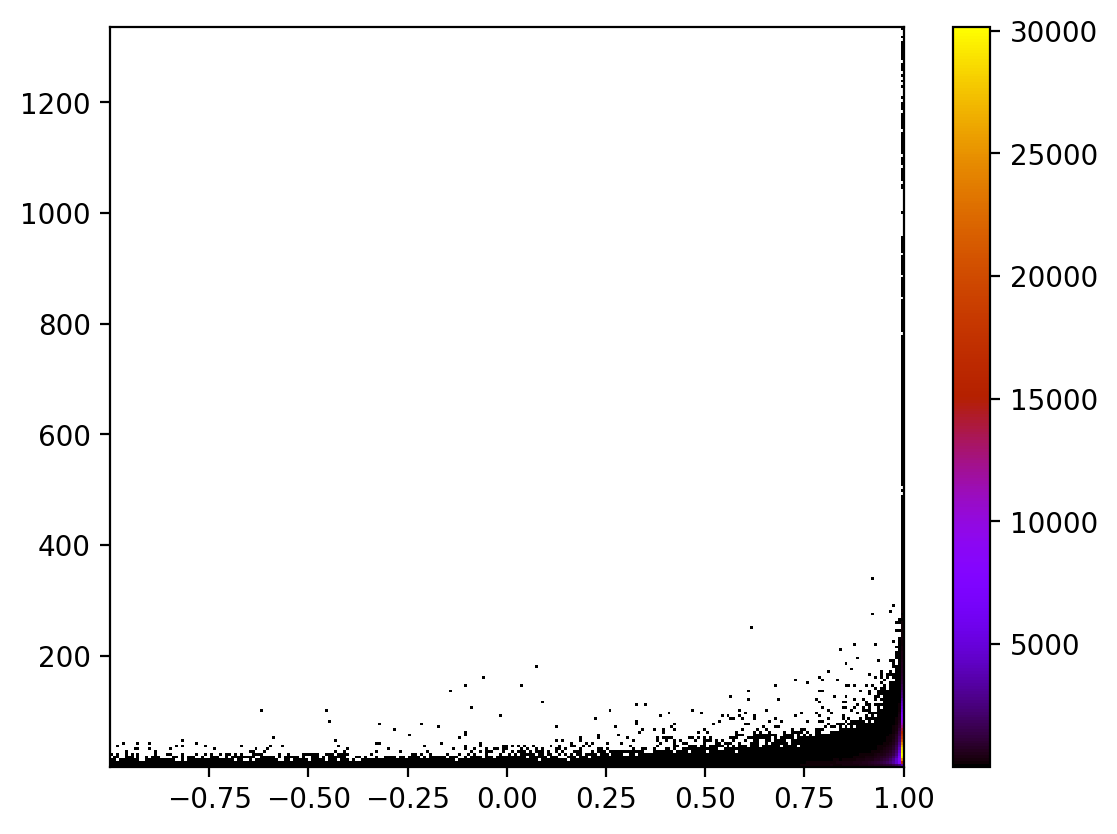

In [19]:
x = np.concatenate(df['Cos Sim'].values)
y = np.concatenate(df['Members magnitudes'].values)

plt.rcParams['figure.dpi'] = 200

xquant = np.quantile(x,0.95)
yquant = np.quantile(y,0.95)


bins = math.isqrt(len(df))
plt.hist2d(x,y,bins=bins,cmin=1,cmap=plt.cm.gnuplot)#, range=[[min(x),max(x)],[0,50]])
#plt.xlabel('Mean cosine similarity (Dataset Forces vs Mean prediction)')
#plt.ylabel('Error in predicted force magnitude')
#plt.axhline(yquant95)
#plt.axvline(xquant95)
plt.colorbar()
plt.show()

In [36]:
len(np.tile(x,8))

582000

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

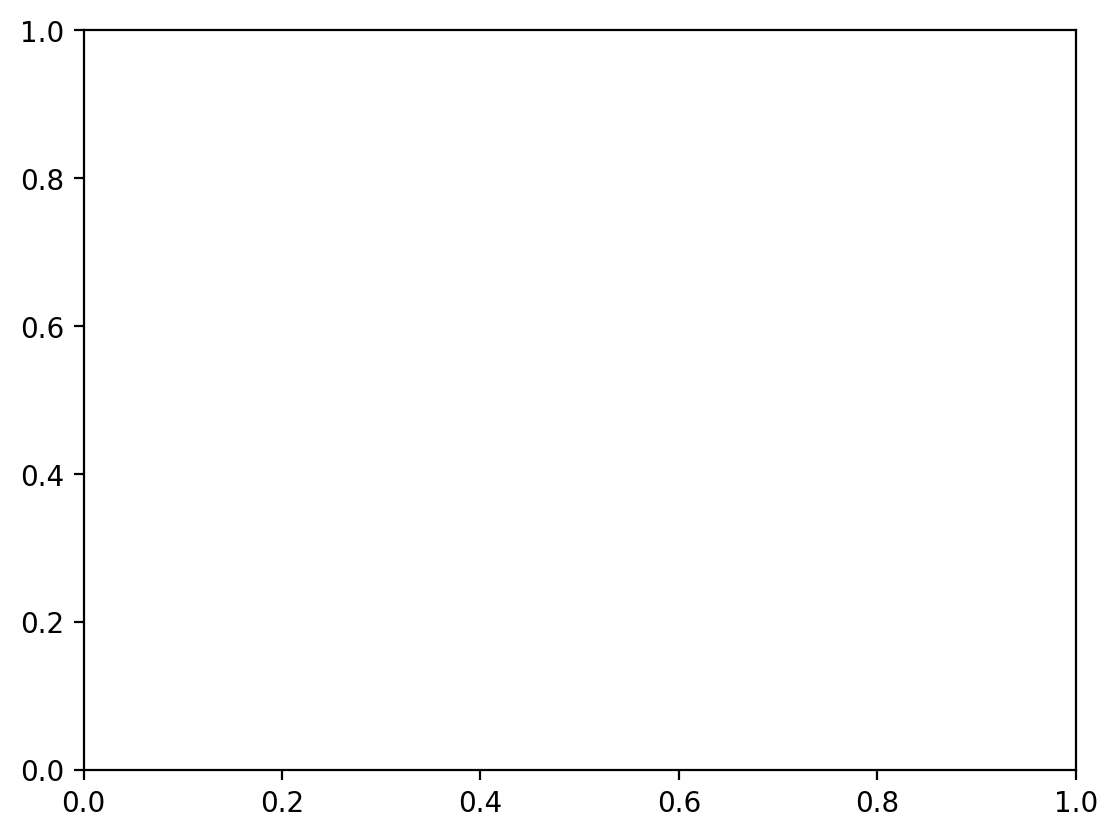

In [27]:
x = np.tile(df['Mean Cos Sim'],8)
y = np.concatenate(df['Members magnitudes'])

x = x.flatten()  # Reshape x to be a 1D array
y = y.flatten()  # Reshape y to be a 1D array

plt.rcParams['figure.dpi'] = 200

xquant = np.quantile(x, 0.95)

bins = np.linspace(np.min(x), np.max(x), math.isqrt(len(df)) + 1)
plt.hist2d(x, y, bins=[bins, bins], cmin=1, cmap=plt.cm.gnuplot)
plt.xlabel('Mean cosine similarity (Dataset Forces vs Mean prediction)')
#plt.ylabel('Error in predicted force magnitude')
#plt.axhline(yquant95)
#plt.axvline(xquant95)
plt.colorbar()
plt.show()


In [53]:
min(df['Mean Cos Sim'])

-0.99937965503156

In [49]:
#df['Column1'] = df['Column1'].map(lambda x: [item for sublist in x for item in sublist])

In [7]:
magnitudes_df = pd.DataFrame(columns=['Species','Dataset magnitudes', 'Members magnitudes', 'Mean magnitudes', 'Stdev magnitudes', 'Difference'])
dataset_magnitudes_list = []
members_magnitudes_list = []
mean_magnitudes_list = []
stdev_magnitudes_list = []


count = 1
stop = 72751

for formula, row in tqdm(df.iterrows()):

    dataset_forces = row['Dataset forces']
    dataset_forces = torch.tensor(dataset_forces)
    dataset_magnitudes = dataset_forces.norm(dim=-1)
    dataset_magnitudes_list.append(torch.squeeze(dataset_magnitudes,0))
    #print('ds magnitudes\n', dataset_magnitudes)
    
    members_forces = row['Members forces']
    members_forces = [torch.tensor(force) for force in members_forces]
    members_magnitudes = [torch.norm(force, dim=-1) for force in members_forces]
    members_magnitudes_list.append(torch.stack(members_magnitudes))
    
    mean_forces = row['Mean forces']
    mean_forces = torch.tensor(mean_forces)
    mean_magnitudes = torch.norm(mean_forces, dim=-1)
    mean_magnitudes_list.append(mean_magnitudes)
    
    stdev_magnitudes = torch.stack(members_magnitudes).std(dim=0)
    stdev_magnitudes_list.append(stdev_magnitudes)
    count += 1
    if count > stop: break
    
magnitudes_df['Species'] = df['Species']
magnitudes_df['Dataset magnitudes'] = dataset_magnitudes_list
magnitudes_df['Members magnitudes'] = members_magnitudes_list
magnitudes_df['Mean magnitudes'] = mean_magnitudes_list
magnitudes_df['Stdev magnitudes'] = stdev_magnitudes_list
magnitudes_df['Difference'] = abs(magnitudes_df['Dataset magnitudes']-magnitudes_df['Mean magnitudes'])


72750it [00:22, 3302.31it/s]


In [8]:
magnitudes_df = magnitudes_df.set_index('Species')

In [9]:
# Convert Dataset magnitudes column
magnitudes_df['Dataset magnitudes'] = magnitudes_df['Dataset magnitudes'].apply(lambda x: x.numpy())

# Convert Members magnitudes column
magnitudes_df['Members magnitudes'] = magnitudes_df['Members magnitudes'].apply(lambda x: np.array([item.numpy() for item in x]))

# Convert Mean magnitudes column
magnitudes_df['Mean magnitudes'] = magnitudes_df['Mean magnitudes'].apply(lambda x: x.numpy())

# Convert Stdev magnitudes column
magnitudes_df['Stdev magnitudes'] = magnitudes_df['Stdev magnitudes'].apply(lambda x: x.numpy())

# Convert Difference column
magnitudes_df['Difference'] = magnitudes_df['Difference'].apply(lambda x: x.numpy())

In [10]:
print((magnitudes_df.loc[1]['Stdev magnitudes']/magnitudes_df.loc[1]['Mean magnitudes']).mean())
print((magnitudes_df.loc[6]['Stdev magnitudes']/magnitudes_df.loc[6]['Mean magnitudes']).mean())
print((magnitudes_df.loc[7]['Stdev magnitudes']/magnitudes_df.loc[7]['Mean magnitudes']).mean())
print((magnitudes_df.loc[8]['Stdev magnitudes']/magnitudes_df.loc[8]['Mean magnitudes']).mean())

0.054517636791615684
0.053965947797448954
0.08913453868464032
0.07900946577950686


72750


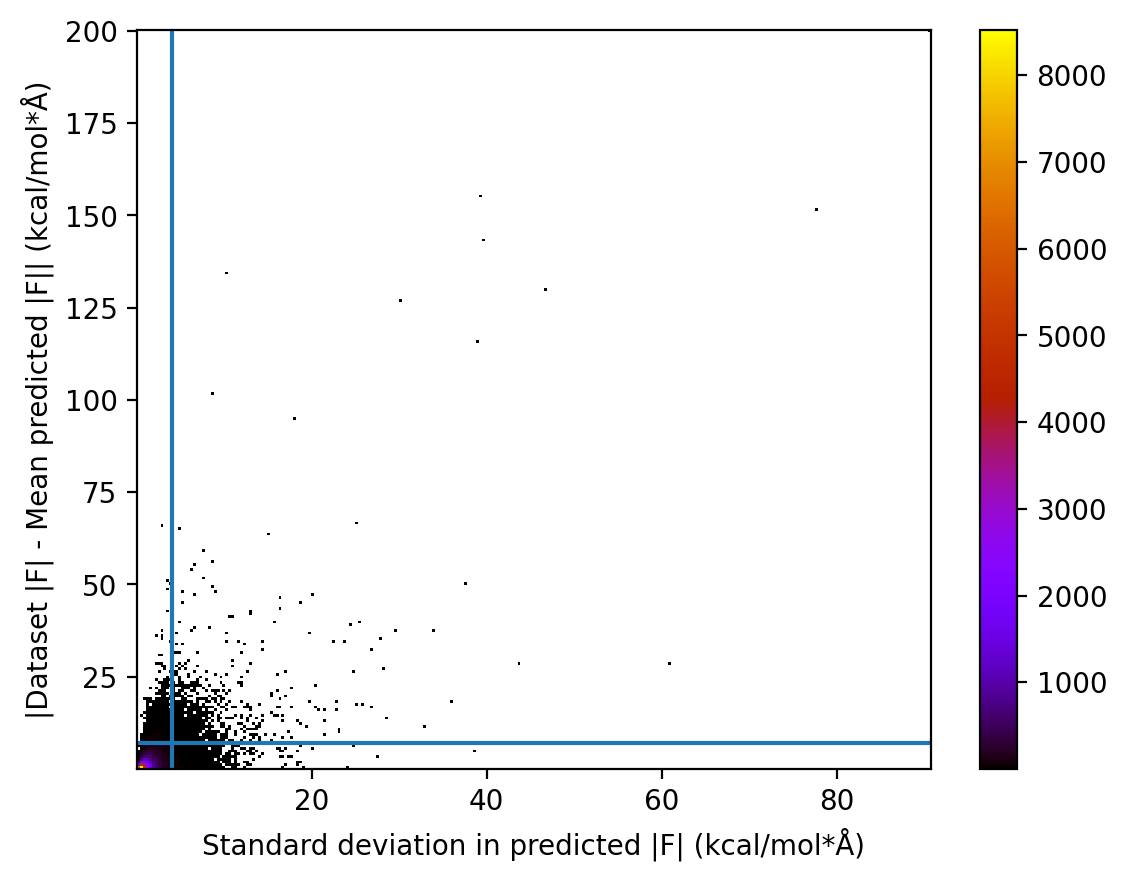

In [11]:
x = df['Stdev magnitudes'].to_numpy()
y = df['Difference'].to_numpy()

plt.rcParams['figure.dpi'] = 200

print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(df)),math.isqrt(len(df))),cmin=1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Standard deviation in predicted |F| (kcal/mol*Å)')
plt.ylabel('|Dataset |F| - Mean predicted |F|| (kcal/mol*Å)')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

In [12]:
h_df = magnitudes_df.loc[1]
c_df = magnitudes_df.loc[6]
n_df = magnitudes_df.loc[7]
o_df = magnitudes_df.loc[8]

In [ ]:
from matplotlib.ticker import PercentFormatter

%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# Carbon histograms
print(len(c_stdev))



plt.hist(hartree2kcalmol(c_stdev),bins=100,weights=(np.ones(len(c_stdev)) / len(c_stdev)),color='darkviolet', range=[0,10])

plt.gca().yaxis.set_major_formatter(PercentFormatter(1,decimals=0))

#plt.axvline(x = 7.436886, color = 'r', label = 'axvline - full height')


plt.xlabel('Standard deviation in predicted carbon energy contribution (kcal/mol)')
plt.ylabel('Frequency')
#plt.title('ANI-1x first conformer subset')
plt.show()

print('Average standard deviation in carbon energy contribution:',round(hartree2kcalmol(np.mean(c_stdev)),3),'kcal/mol')

36329


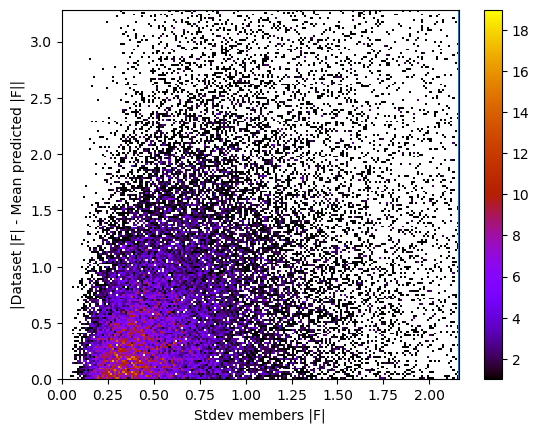

In [56]:
x = h_df['Stdev magnitudes'].to_numpy()
y = h_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(h_df)),math.isqrt(len(h_df))),cmin=1,cmap=plt.cm.gnuplot, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

21907


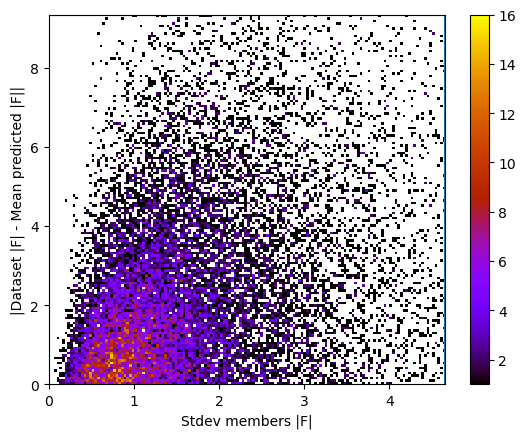

In [61]:
x = c_df['Stdev magnitudes'].to_numpy()
y = c_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(c_df)),math.isqrt(len(c_df))),cmin=1,cmap=plt.cm.gnuplot, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

8211


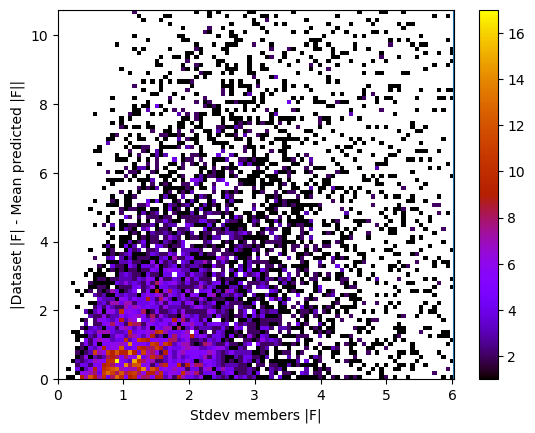

In [62]:
x = n_df['Stdev magnitudes'].to_numpy()
y = n_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(n_df)),math.isqrt(len(n_df))),cmin=1,cmap=plt.cm.gnuplot, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

6303


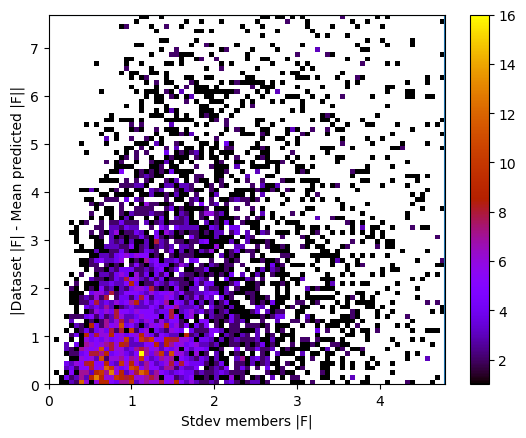

In [60]:
x = o_df['Stdev magnitudes'].to_numpy()
y = o_df['Difference'].to_numpy()
print(len(x))
xquant95 = np.quantile(x,0.95)
yquant95 = np.quantile(y,0.95)
plt.hist2d(x,y,bins=(math.isqrt(len(o_df)),math.isqrt(len(o_df))),cmin=1,cmap=plt.cm.gnuplot, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Stdev members |F|')
plt.ylabel('|Dataset |F| - Mean predicted |F||')
plt.axhline(yquant95)
plt.axvline(xquant95)
plt.colorbar()
plt.show()

In [29]:
print(sum([len(h_df),len(c_df),len(n_df),len(o_df)]))

72750


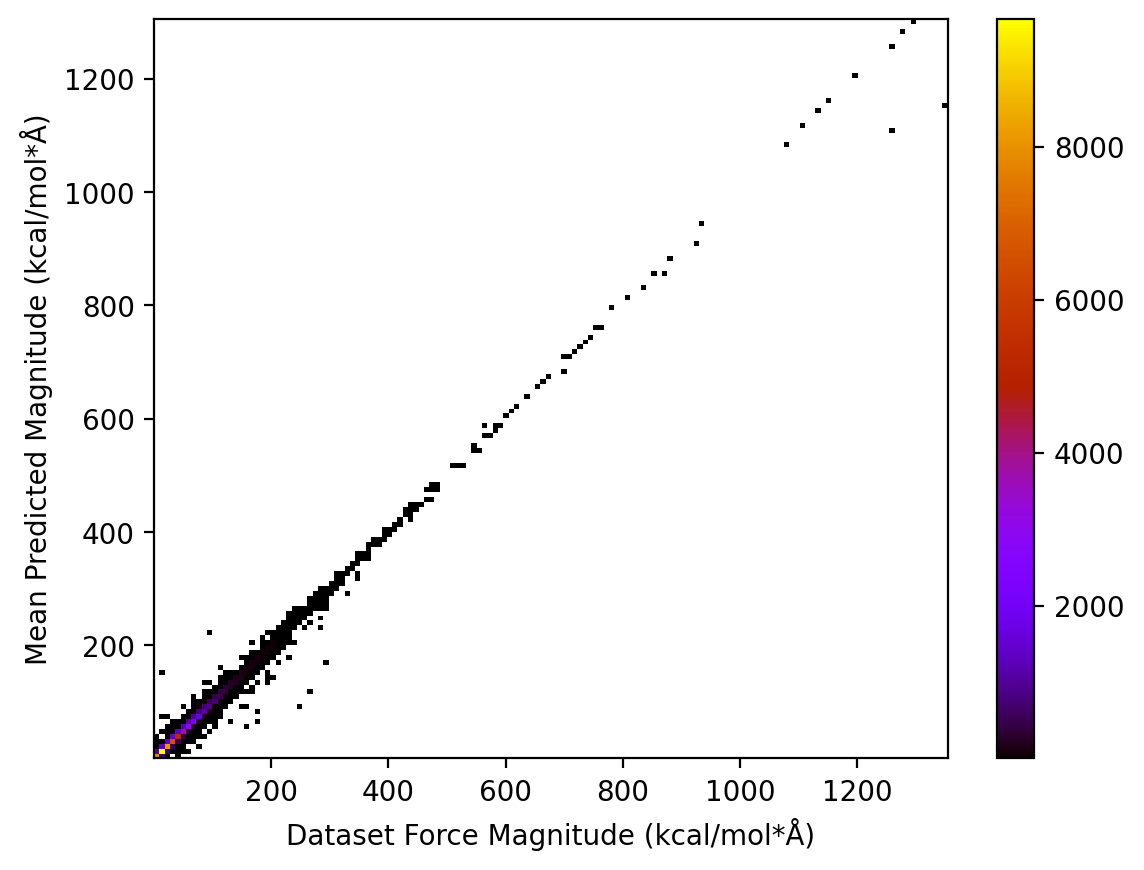

In [22]:
x = magnitudes_df['Dataset magnitudes'].to_numpy()
y = magnitudes_df['Mean magnitudes'].to_numpy()
xquant95 = np.quantile(x,0.99)
yquant95 = np.quantile(y,0.99)

plt.rcParams['figure.dpi'] = 200


plt.hist2d(x,y,bins=(150,150),cmin=0.1,cmap=plt.cm.gnuplot)#, range=[[0,xquant95],[0,yquant95]])
plt.xlabel('Dataset Force Magnitude (kcal/mol*Å)')
plt.ylabel('Mean Predicted Magnitude (kcal/mol*Å)')
#plt.axline((0, 0), slope=1)
plt.colorbar()
plt.show()